In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import h5py
from keras.models import load_model
from google.colab import data_table
from vega_datasets import data
import os
import glob
import cv2


In [ ]:
train = '/content/drive/MyDrive/project/Face Mask Dataset/Train'
test = '/content/drive/MyDrive/project/Face Mask Dataset/Test'
val = '/content/drive/MyDrive/project/Face Mask Dataset/Validation'
path = '/content/drive/MyDrive/project/Face Mask Dataset'

images = {
    "split": [],
    "mask": [],
    "image": []
}

for split in os.listdir(path):
  for mask in os.listdir(path+"/"+split):
    for image in glob.glob(path+"/"+split+"/"+mask+"/"+"*.png"):
      images["image"].append(image)
      images["mask"].append(mask)
      images["split"].append(split)

images = pd.DataFrame(images)

images

,split,mask,image
0,Test,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
1,Test,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
2,Test,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
3,Test,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
4,Test,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
...,...,...,...
11787,Train,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
11788,Train,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
11789,Train,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...
11790,Train,WithoutMask,/content/drive/MyDrive/project/Face Mask Datas...


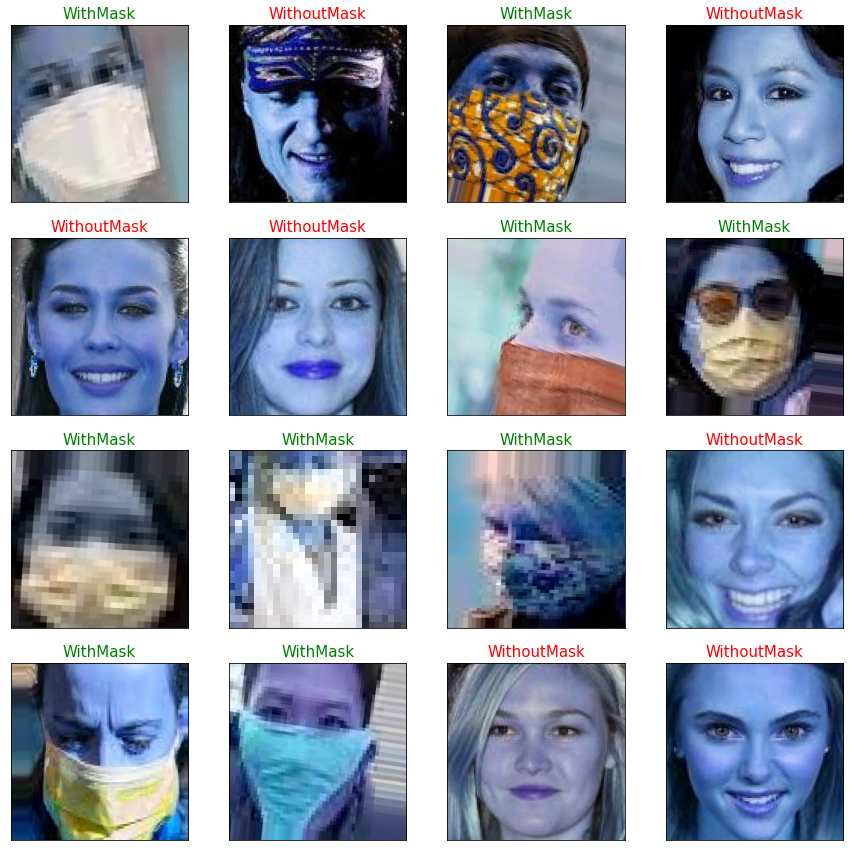

In [ ]:
plt.figure(figsize = (15,15))
for i in range(16):
    random = np.random.randint(1,len(images))
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(images.loc[random,"image"]))
    plt.title(images.loc[random, "mask"], size = 15, color = "green" if images.loc[random, "mask"] == 'WithMask' else "red")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
datagen1 = ImageDataGenerator(
        rescale=1.0/255,
        )

In [ ]:
train_gen1 = datagen1.flow_from_directory(directory=train,target_size=(150,150),class_mode='categorical',batch_size=32)
test_gen1 = datagen1.flow_from_directory(directory=test,target_size=(150,150),class_mode='categorical',batch_size=32)
val_gen1 = datagen1.flow_from_directory(directory=val,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
h1 = model1.fit(
  train_gen1,
  validation_data=val_gen1,
  epochs=10
)

Epoch 1/10
313/313 [==============================] - 922s 3s/step - loss: 0.1544 - accuracy: 0.9404 - val_loss: 0.1294 - val_accuracy: 0.9488
Epoch 2/10
313/313 [==============================] - 43s 136ms/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.0432 - val_accuracy: 0.9962
Epoch 3/10
313/313 [==============================] - 43s 137ms/step - loss: 0.0351 - accuracy: 0.9873 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 4/10
313/313 [==============================] - 43s 136ms/step - loss: 0.0298 - accuracy: 0.9888 - val_loss: 0.0374 - val_accuracy: 0.9850
Epoch 5/10
313/313 [==============================] - 43s 138ms/step - loss: 0.0204 - accuracy: 0.9926 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 6/10
313/313 [==============================] - 44s 142ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.0221 - val_accuracy: 0.9925
Epoch 7/10
313/313 [==============================] - 44s 139ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0493 - val_accu

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 flatten (Flatten)           (None, None)              0

In [ ]:
datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )

In [ ]:
train_gen = datagen.flow_from_directory(directory=train,target_size=(150,150),class_mode='categorical',batch_size=32, shuffle=True)
test_gen = datagen.flow_from_directory(directory=test,target_size=(150,150),class_mode='categorical',batch_size=32)
val_gen = datagen1.flow_from_directory(directory=val,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=10
)

Epoch 1/10
313/313 [==============================] - 102s 323ms/step - loss: 0.3368 - accuracy: 0.8791 - val_loss: 0.1166 - val_accuracy: 0.9638
Epoch 2/10
313/313 [==============================] - 101s 322ms/step - loss: 0.1943 - accuracy: 0.9280 - val_loss: 0.0884 - val_accuracy: 0.9712
Epoch 3/10
313/313 [==============================] - 101s 322ms/step - loss: 0.1759 - accuracy: 0.9355 - val_loss: 0.0910 - val_accuracy: 0.9700
Epoch 4/10
313/313 [==============================] - 102s 324ms/step - loss: 0.1618 - accuracy: 0.9409 - val_loss: 0.1197 - val_accuracy: 0.9625
Epoch 5/10
313/313 [==============================] - 102s 327ms/step - loss: 0.1527 - accuracy: 0.9458 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 6/10
313/313 [==============================] - 102s 326ms/step - loss: 0.1517 - accuracy: 0.9424 - val_loss: 0.0874 - val_accuracy: 0.9712
Epoch 7/10
313/313 [==============================] - 102s 326ms/step - loss: 0.1436 - accuracy: 0.9502 - val_loss: 0.0682 -

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 flatten_1 (Flatten)         (None, None)             

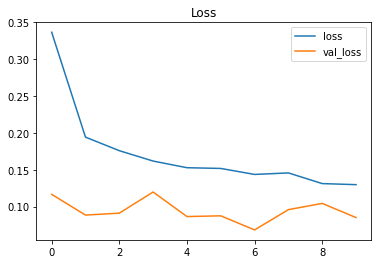

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

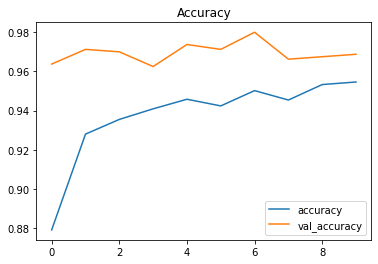

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
eva = model.evaluate(train_gen, verbose=0)

In [ ]:
print("    Loss: {:.5f}".format(eva[0]))
print("Accuracy: {:.3f}%".format(eva[1] * 100))

    Loss: 0.12185
Accuracy: 95.650%


In [ ]:
model.save('my_model.h5')

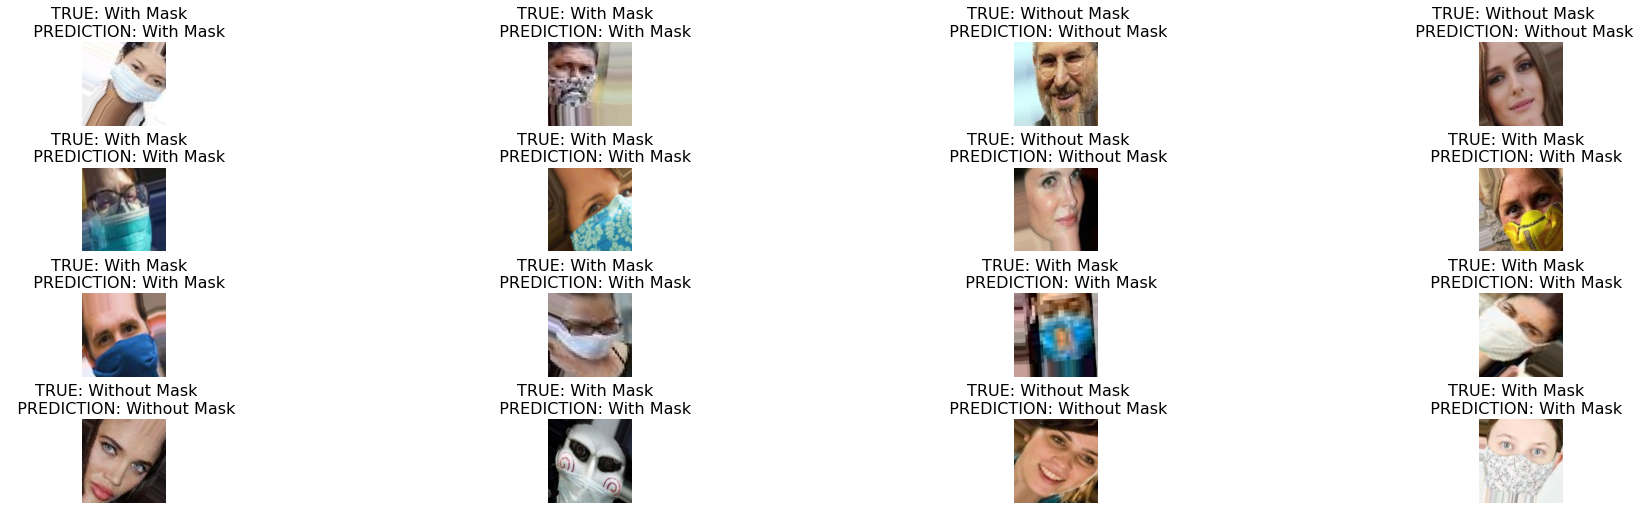

In [ ]:
image, label = train_gen.next()
num_imgs = 16
lab_names = ['With Mask','Without Mask ']
images = image[0:num_imgs,:,:,:]
labels = label[0:num_imgs,:]
predict = np.round(model.predict(images))

image_rows = 4
image_col = int(num_imgs/image_rows)

_, axs = plt.subplots(image_rows, image_col, figsize=(32,8))
axs = axs.flatten()

for i in range(num_imgs):
    img = images[i,:,:,:]
    lab = labels[i,:]
    axs[i].imshow(img)
    pred = predict[i]
    axs[i].axis('off')
    lab, pred = np.argmax(lab), np.argmax(pred)
    axs[i].set_title(label = f'TRUE: {lab_names[lab]}  \n  PREDICTION: {lab_names[pred]}', fontsize=16)

plt.subplots_adjust(bottom=0.1, 
                    top=0.9,  
                    hspace=0.5)
plt.show()